In [18]:
import pandas as pd
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
holdout.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [19]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [20]:
def process_df(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    cols_to_dummy = ["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]
    for c in cols_to_dummy:
        df = create_dummies(df, c)
        
    return df

train = process_df(train)
holdout = process_df(holdout)

## Passenger Blood relative count analysis
* **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
* **Parch** - The number of parents or children the passenger had aboard the Titanic

In [21]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

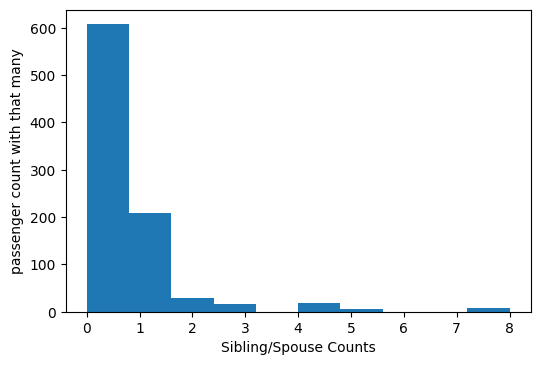

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
train['SibSp'].plot.hist()
plt.ylabel("passenger count with that many")
plt.xlabel("Sibling/Spouse Counts")
train['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

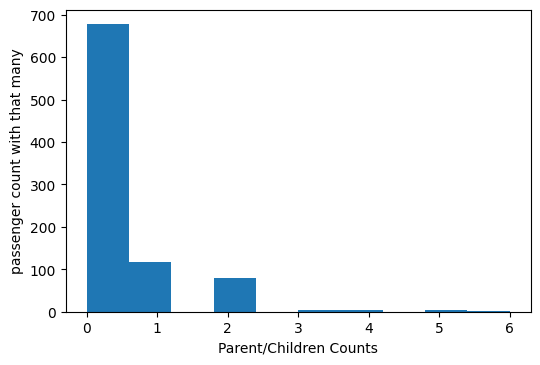

In [24]:
train['Parch'].plot.hist()
plt.ylabel("passenger count with that many")
plt.xlabel("Parent/Children Counts")
train['Parch'].value_counts()

In [25]:
# mean tells us the ratio of of people in that category that survived
survival_pivot = train[['SibSp', 'Survived']].pivot_table(index=['SibSp'], values=['Survived'], aggfunc=['mean', 'sum'])
print(survival_pivot)

           mean      sum
       Survived Survived
SibSp                   
0      0.345395      210
1      0.535885      112
2      0.464286       13
3      0.250000        4
4      0.166667        3
5      0.000000        0
8      0.000000        0


In [26]:
# mean tells us the ratio of of people in that category that survived
survival_pivot = train[['Parch', 'Survived']].pivot_table(index=['Parch'], values=['Survived'], aggfunc=['mean', 'sum'])
print(survival_pivot)

           mean      sum
       Survived Survived
Parch                   
0      0.343658      233
1      0.550847       65
2      0.500000       40
3      0.600000        3
4      0.000000        0
5      0.200000        1
6      0.000000        0


In [27]:
relatives = train[['Parch', 'SibSp']].sum(axis=1)
# print(len(relatives), relatives.value_counts(dropna=False), relatives)
relatives_dict = {'Parch':train['Parch'],
             'SibSp':train['SibSp'],
             'Relatives':relatives,
             'Survived':train['Survived']
            }
relatives_df = pd.DataFrame(relatives_dict)
print(relatives_df)

     Parch  SibSp  Relatives  Survived
0        0      1          1         0
1        0      1          1         1
2        0      0          0         1
3        0      1          1         1
4        0      0          0         0
..     ...    ...        ...       ...
886      0      0          0         0
887      0      0          0         1
888      2      1          3         0
889      0      0          0         1
890      0      0          0         0

[891 rows x 4 columns]


               mean      sum
           Survived Survived
Relatives                   
0          0.303538      163
1          0.552795       89
2          0.578431       59
3          0.724138       21
4          0.200000        3
5          0.136364        3
6          0.333333        4
7          0.000000        0
10         0.000000        0


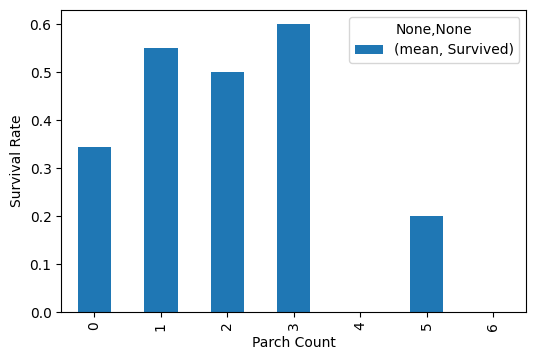

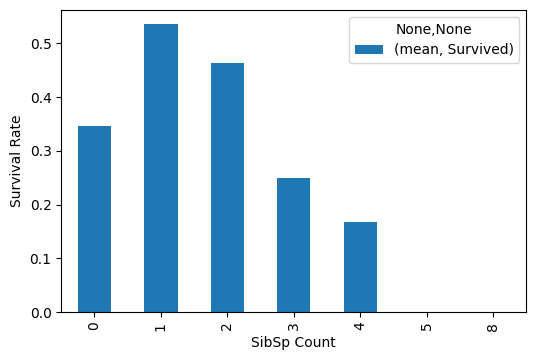

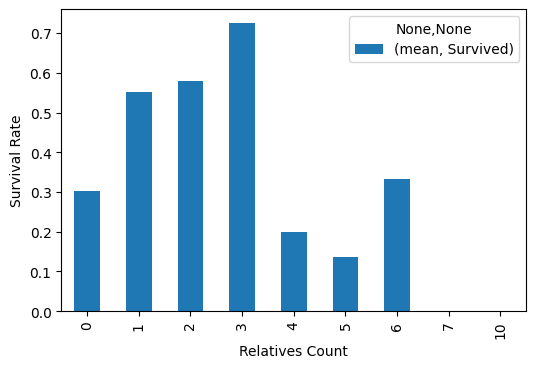

In [28]:
survival_pivot = relatives_df[['Relatives', 'Survived']].pivot_table(index=['Relatives'], values=['Survived'], aggfunc=['mean', 'sum'])
print(survival_pivot)
for c in ['Parch', 'SibSp', 'Relatives']:
    survival_pivot = relatives_df[[c, 'Survived']].pivot_table(index=[c], values=['Survived'], aggfunc=['mean'])
    survival_pivot.plot.bar()
    plt.xlabel(c +" Count")
    plt.ylabel("Survival Rate")
    plt.show()

In [29]:
# create a function that adds a column indicating if a passenger has relatives on board (1,0)
def process_solo_passengers(df):
    alone_filter = (df['SibSp']==0) & (df['Parch']==0)
    df["isalone"] = pd.Series(alone_filter).astype('int64')
    return df

In [30]:
train = process_solo_passengers(train)
holdout = process_solo_passengers(holdout)

In [46]:
# create a function to find the optimal features through Recursive Feature Elimination
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
def select_features(df):
    df = df.dropna(axis=1)
    df = df.select_dtypes(include=['float64', 'int64'])
    
    feature_cols = list(df.columns)
    feature_cols.remove('PassengerId')
    feature_cols.remove('Survived')
    all_X = df[feature_cols]
    
    all_y = df['Survived']
    
    rfc = RandomForestClassifier(random_state=1)
    selector = RFECV(rfc, cv=10)
    selector.fit(all_X, all_y)
    optimized_columns = all_X.columns[selector.support_]
    print(optimized_columns)
    return optimized_columns

In [47]:
optimized_columns = select_features(train)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'isalone'], dtype='object')


In [51]:
# create function to GridSearch the optimal parameters for multiple models (& find the best performing one) 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, feature_list):
    all_X = df[feature_list]
    all_y = df['Survived']
    hyperparameter_dict_list = [
        {
        "name": "LogisticRegression",
        "estimator": LogisticRegression(),
        "hyperparameters":
            {
                "solver": ["newton-cg", "lbfgs", "liblinear"]
            }
        },
        {
        "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters":
            {
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
            }
        },
        {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(),
        "hyperparameters":
            {
                "n_estimators": [4, 6, 9],
                "criterion": ["entropy", "gini"],
                "max_depth": [2, 5, 10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1, 5, 8],
                "min_samples_split": [2, 3, 5]
            }
        }
    ]
    
    for hp in hyperparameter_dict_list:
        print(hp['name'])
        grid = GridSearchCV(estimator=hp['estimator'], param_grid=hp["hyperparameters"], cv=10)
        grid.fit(all_X, all_y)
        hp['best_params'] = grid.best_params_
        hp['best_model'] = grid.best_estimator_
        print("best_params: ", grid.best_params_)
        print("best_score: ", grid.best_score_)
    
    return hyperparameter_dict_list

In [50]:
model_performance_dict = select_model(train, optimized_columns)

LogisticRegression
best_params:  {'solver': 'newton-cg'}
best_score:  0.7206242197253434
KNeighborsClassifier
best_params:  {'algorithm': 'brute', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
best_score:  0.6981897627965045
RandomForestClassifier
best_params:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 9}
best_score:  0.7430961298377029


## consider engineering more/better features

In [53]:
# submit the best model to Kaggle
def save_submission_file(model, feature_cols, filename="submission.csv"):
    holdout_predictions = model.predict(holdout[feature_cols])
    df_dict = {'PassengerId': holdout['PassengerId'],
               'Survived': holdout_predictions
              }
    submission = pd.DataFrame(df_dict)
    submission.to_csv(filename, index=False)

In [55]:
save_submission_file(model_performance_dict[2]['best_model'], optimized_columns)